# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of  beautiful Scikit-learn library

What we're going to cover:

0. An end-to-end sklearn workflow
1. Getting the data ready
2. Choose the right estimators/algorithm for our problems
3. Fit the model/algorithm & use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end sklearn workflow

In [1]:
import numpy as np

In [2]:
# 1. Get the data ready
import pandas as pd
heartDisease = pd.read_csv('data/heart-disease.csv')
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X(feature matrix)
X = heartDisease.drop('target', axis=1)

# Create Y(labels)
y = heartDisease.target

In [4]:
# 2. Create the right model and hyerparamenters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# we will keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.3)

In [6]:
clf.fit(XTrain, yTrain);

In [7]:
XTrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3


In [8]:
# make a prediction
ylabel = clf.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
XTest

In [ ]:
y_preds = clf.predict(XTest)
y_preds

In [ ]:
yTest

In [9]:
# 4, Evaluate the model on training data and test data
clf.score(XTrain, yTrain)

1.0

In [10]:
clf.score(XTest, yTest)

0.9010989010989011

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(yTest, y_preds))

NameError: name 'y_preds' is not defined

In [12]:
confusion_matrix(yTest, y_preds)

NameError: name 'y_preds' is not defined

In [13]:
accuracy_score(yTest, y_preds)

NameError: name 'y_preds' is not defined

In [14]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(20, 120, 50):
    print(f"Trying classifier for {i} ") 
    clf = RandomForestClassifier(n_estimators=i).fit(XTrain, yTrain)
    print(f"Model accouracy on test set:{clf.score(XTest, yTest) * 100:.2f}%")
    print("")

Trying classifier for 20 
Model accouracy on test set:84.62%

Trying classifier for 70 
Model accouracy on test set:87.91%



In [15]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("models/randomForestModel.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("models/randomForestModel.pkl", "rb"))
loaded_model.score(XTest, yTest)

0.8791208791208791

## 1. Getting data ready to be used with M/L

There are 3 main things, we need to do:
    
    1. Split the data into features and labels usually 'X's & 'y's
    2. Filling or disregarding missing values
    3. Converting non-numerical values to numerical values(also called feature encoding)

In [17]:
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heartDisease.drop("target", axis=1) # Axis 1=age,sex, cp,trestbps,chol, fbs, restecg, thalach, exang, oldpeak, slope, ca,thal

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heartDisease.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
XTrain.shape, XTest.shape, yTrain.shape, yTest.shape

((212, 13), (91, 13), (212,), (91,))

In [21]:
X.shape[0] * 0.8

242.4

In [22]:
242 + 61

303

In [23]:
len(heartDisease)

303

## 1.1 Make sure its all numerical

In [24]:
carSales = pd.read_csv("data/car-sales-extended.csv")

In [25]:
carSales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
carSales.Doors.value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [27]:
len(carSales)

1000

In [28]:
carSales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# Split into X/y
X = carSales.drop("Price", axis=1)
y = carSales.Price

# Spit into training and test
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)

In [30]:
# Build M/L model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(XTrain, yTrain)
model.score(XTest, yTest)

ValueError: could not convert string to float: 'Toyota'

In [31]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [32]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("oneHot",
                                oneHot,
                                 categoricalFeatures)],
                               remainder="passthrough")
transformedX = transformer.fit_transform(X)
transformedX

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [33]:
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [35]:
dummies = pd.get_dummies(carSales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [36]:
# Let's refit the model
np.random.seed(42)
XTrain, XTest, yTrain, yTest = train_test_split(transformedX,
                                               y,
                                               test_size = 0.2)

model.fit(XTrain, yTrain)

RandomForestRegressor()

In [37]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [38]:
model.score(XTest, yTest)

0.3235867221569877

## 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove samples with missing data altogether.

In [39]:
# Import carSales missing data
carSalesMissing = pd.read_csv("data/car-sales-extended-missing-data.csv")
carSalesMissing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [40]:
carSalesMissing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# Create X & y
X = carSalesMissing.drop("Price", axis= 1)
y = carSalesMissing.Price

In [42]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("oneHot",
                                oneHot,
                                 categoricalFeatures)],
                               remainder="passthrough")
transformedX = transformer.fit_transform(X)
transformedX

ValueError: Input contains NaN

In [43]:
carSalesMissing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with Pandas

In [44]:
carSalesMissing.Doors.value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [45]:
# Fill the 'Make' column
carSalesMissing.Make.fillna("missing", inplace=True)

# Fill the "Colour" column 
carSalesMissing.Colour.fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
carSalesMissing["Odometer (KM)"].fillna(carSalesMissing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors column"
carSalesMissing.Doors.fillna(4, inplace=True)

In [46]:
# Checkout data frame again
carSalesMissing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
carSalesMissing.dropna(inplace=True)

In [48]:
carSalesMissing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
len(carSalesMissing)

950

In [50]:
X = carSalesMissing.drop("Price", axis=1)
y = carSalesMissing.Price

In [51]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("oneHot",
                                oneHot,
                                 categoricalFeatures)],
                               remainder="passthrough")
transformedX = transformer.fit_transform(X)
transformedX

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### Option 2: Fill missing values with Scikit-Learn

In [52]:
carSalesMissing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [53]:
carSalesMissing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [54]:
# Drop the rows with no labels
carSalesMissing.dropna(subset=["Price"], inplace=True)
carSalesMissing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
# Split into X & y
X = carSalesMissing.drop("Price", axis=1)
y = carSalesMissing.Price

In [56]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [57]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
catImputer = SimpleImputer(strategy='constant', fill_value="missing")
doorImputer = SimpleImputer(strategy='constant', fill_value=4)
numImputer= SimpleImputer(strategy='mean')

# Define Columns
catFeatures = ['Make', 'Colour']
doorFeature = ["Doors"]
numFeatures = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("catImputer", catImputer, catFeatures),
    ("doorImputer", doorImputer, doorFeature),
    ("numImputer", numImputer, numFeatures)
])

# Transform the data
filledX = imputer.fit_transform(X)
filledX

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [58]:
carSalesFilled = pd.DataFrame(filledX,
                             columns=["Make", "Colour", "Doors", "Odometer (KM)"])
carSalesFilled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [59]:
carSalesFilled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [60]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categoricalFeatures = ["Make", "Colour","Doors"]
oneHot = OneHotEncoder()
transformer = ColumnTransformer([("oneHot",
                                oneHot,
                                 categoricalFeatures)],
                               remainder="passthrough")
transformedX = transformer.fit_transform(carSalesFilled)
transformedX

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [61]:
# Now we 've' got our data as numbers and filled (no missing values)
# Let's fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

XTrain, XTest, yTrain, yTest = train_test_split(transformedX,
                                               y,
                                               test_size = 0.2)
model = RandomForestRegressor()
model.fit(XTrain, yTrain)
model.score(XTest, yTest)

0.21990196728583944

In [62]:
len(carSalesFilled), len(carSales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for our problem

Scikit-learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether sample is one thing or another
* Regression - predicting a number

Step 1- Check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a m/l model for a regression problem

In [63]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [64]:
bostonDf = pd.DataFrame(boston["data"], columns=boston["feature_names"])
bostonDf["target"] = pd.Series(boston["target"])
bostonDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [65]:
# How many samples?
len(bostonDf)

506

In [66]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data 
X = bostonDf.drop("target", axis=1)
y = bostonDf.target

# Split into train and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y, 
                                               test_size=0.2)

# Instantiate the Ridge model
model = Ridge()
model.fit(XTrain, yTrain)

# Check the score of Ridge model on test data
model.score(XTest, yTest)

0.6662221670168523

How do we improve score?

What if Ridge wasn't working?

Let's refer back to map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [67]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = bostonDf.drop("target", axis=1)
y = bostonDf.target

# Split the data
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y, 
                                               test_size=0.2)

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(XTrain, yTrain)

# Check the score of Ridge model on test data
rf.score(XTest, yTest)

0.8654448653350507

In [68]:
# Check the Ridge model again
model.score(XTest, yTest)

0.6662221670168523

### 2.2 Choosing and estimator for classification problem

Let's go to the map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [69]:
heartDisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
len(heartDisease)

303

Consulting the map and it says to try `LinearSVC`

In [71]:
# Import the LinarSVC estimator class
from sklearn.svm import LinearSVC

# Setup the random seed
np.random.seed(42)

# Make the data
X = heartDisease.drop("target", axis=1)
y = heartDisease.target

# Split the data
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(XTrain, yTrain)

# Evaluate the LinearSVC
clf.score(XTest, yTest)

/home/akshatz/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [72]:
heartDisease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [73]:
# Import the `RandomForestClassifier` estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(42)

# Make the data
X = heartDisease.drop("target", axis=1)
y = heartDisease.target

# Split the data
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)

# Instantiate RandomForesrtClassifier
clf = RandomForestClassifier()
clf.fit(XTrain, yTrain)

# Evaluate the RandomForestClassifier
clf.score(XTest, yTest)

0.8524590163934426

Titbit:

    1. If you have structured data, use ensemble methods
    2. If youu have unstructured data, use Deeplearning or trasfer learning

In [74]:
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/ algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [75]:
# Import the `RandomForestClassifier` estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(42)

# Make the data
X = heartDisease.drop("target", axis=1)
y = heartDisease.target

# Split the data
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)

# Instantiate RandomForesrtClassifier
clf = RandomForestClassifier()
print(clf)
# Fit the model to the data(training machine learning model)
clf.fit(XTrain, yTrain)

# Evaluate the RandomForestClassifier(use the patterns the model has learned)
clf.score(XTest, yTest)

RandomForestClassifier()


0.8524590163934426

In [76]:
X.head(), X.tail(), y.head(), y.tail() 

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130  

# Random Forest model Deepdive

Resources for Random Forest Models

* [Random Forest Wikipedia][1]

* [Random Forest in python][2] by yhat

* [An Implementation and Explanation of the Random Forest in Python][3]

[1]:https://en.wikipedia.org/wiki/Random_forest
[2]:http://blog.yhat.com/posts/random-forests-in-python.html#:~:text=by%20yhat%20%7C%20June%205%2C%202013&text=Random%20forest%20is%20capable%20of,about%20random%20forests%20using%20Python
[3]:https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

### 3.2 Make predictions using a machine learning model
2 ways to make predictions:
  1. `predict()`
  2. `predict_proba()`
  

In [77]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [78]:
XTest.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [79]:
clf.predict(XTest)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [80]:
np.array(yTest)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [81]:
# Compare prediction to truth labels to evaluate the model
yPreds = clf.predict(XTest)
np.mean(yPreds == yTest)

0.8524590163934426

In [82]:
clf.score(XTest, yTest)

0.8524590163934426

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest, yPreds)

0.8524590163934426

Make predictions with `predict_proba()`

In [84]:
# predict_proba() returns probabilities of classification label
clf.predict_proba(XTest[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [85]:
# Let's predict() on same data...
clf.predict(XTest[:5])

array([0, 1, 1, 0, 1])

In [86]:
heartDisease.target.value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used in regreesion models 

In [87]:
bostonDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [88]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = bostonDf.drop('target', axis=1)
y = bostonDf.target

# Split into X and y
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor().fit(XTrain, yTrain)

# Make predictions
yPreds = model.predict(XTest)

In [89]:
yPreds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [90]:
np.array(yPreds)

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(yTest, yPreds)

2.136382352941176

## 4. Evaluating a m/l Model

There are 3 ways to evaluate Scikit-Learn models/estimators:

1. Estimator `score` method
2. `Scoring` parameter
3. Metric functions

### 4.1 Evaluating with estimating `score` method

In [93]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heartDisease.drop("target", axis=1)
y = heartDisease.target

XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

clf = RandomForestClassifier()

clf.fit(XTrain, yTrain)



RandomForestClassifier()

In [94]:
clf.score(XTrain, yTrain)

1.0

In [95]:
clf.score(XTest, yTest)

0.8524590163934426

Let's do same but for regression... 

In [96]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create data
X = bostonDf.drop('target', axis=1)
y = bostonDf.target

# Split into X and y
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor().fit(XTrain, yTrain)

In [97]:
model.score(XTest, yTest)

0.8654448653350507

### 4.2 Evaluating a model using `scoring` parameter

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heartDisease.drop("target", axis=1)
y = heartDisease.target

XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

clf = RandomForestClassifier()

clf.fit(XTrain, yTrain)

RandomForestClassifier()

In [99]:
clf.score(XTest, yTest)

0.8524590163934426

In [100]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [101]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [102]:
np.random.seed(42)

# Single training and test split score
clfSingleScore = clf.score(XTest, yTest)

# Take the mean of 5 cross-val scores
clfCrossValScore = (np.mean(cross_val_score(clf, X, y, cv=5)))

# Compare the two
clfSingleScore, clfCrossValScore

(0.8524590163934426, 0.8248087431693989)

In [103]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [ ]:
heartDisease.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heartDisease.drop("target", axis=1)
y = heartDisease.target

clf = RandomForestClassifier()

CrossValScore = cross_val_score(clf, X, y, cv=5)

In [ ]:
c = np.mean(CrossValScore)

In [ ]:
print(f"Heart Disease Classifier Cross-Validated Accuracy:{c * 100:.2f}%")

**Area under the reciever operating curve(AUC/ROC)**
* Area under curve(AUC)
* ROC curve

RIC curve are a comparison of a model's true positive rate(tpr) vs a model's false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
# Create XTest..., etc
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Fit the clssifier
clf.fit(XTrain, yTrain)

# Make predictions with probabilities
yProb = clf.predict_proba(XTest)
yProb[:10], len(yProb)

In [ ]:
yProbPositive = yProb[:, 1]
yProbPositive

In [ ]:
yProbPositive[:10]

In [104]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(yTest, yProbPositive)

# Check the false positive rates
fpr

NameError: name 'roc_curve' is not defined

In [105]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plotRocCurve(fpr, tpr):
    """
    Plot a ROC curve given the false positive rate (fpr) and true positive rate(tpr) 
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr,color="orange", label="ROC")
    # Plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guesing")
    
    # Customise the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plotRocCurve(fpr, tpr)

NameError: name 'fpr' is not defined

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(yTest, yProbPositive)

In [ ]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(yTest, yTest)
plotRocCurve(fpr,tpr)

In [ ]:
# Perfect AUC Score
roc_auc_score(yTest, yTest)

**Confusion Matrix**

A confusion matrix is a quick way to compare the label a model predicts and actual label it was supposed to predict

In essence, giving you an idea of where the model is getting confused.

In [106]:
from sklearn.metrics import confusion_matrix

yPreds = clf.predict(XTest)

confusion_matrix(yTest, yPreds)

array([[24,  5],
       [ 4, 28]])

In [107]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(yTest,
           yPreds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [108]:
24 + 5 + 4 + 28

61

In [109]:
# How to install a conda package into current environment from Jupyter notebook?
import sys
!conda install -y --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.



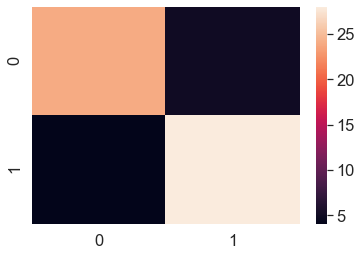

In [110]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create confusion matrix
confMat = confusion_matrix(yTest, yPreds)

# Plot it using seaborn heatmap
sns.heatmap(confMat);

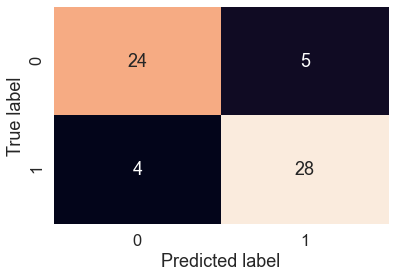

In [111]:
def plotConfMat(confMat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots()
    ax = sns.heatmap(confMat,
                    annot=True, # Annotate the box with confMat info
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label");
 
plotConfMat(confMat)

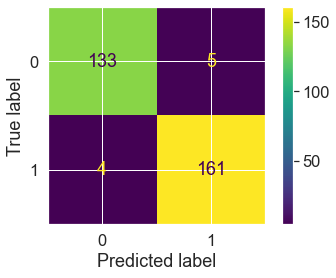

In [112]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y);

**Classification Report** 

In [113]:
from sklearn.metrics import classification_report

print(classification_report(yTest, yPreds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [114]:
# Where precision and recall become valuable
diseaseTrue = np.zeros(10000)
diseaseTrue[0] = 1 # only one positibe case

diseasePreds = np.zeros(10000) # model predicts every case as O


pd.DataFrame(classification_report(diseaseTrue,
                                  diseasePreds,
                                  output_dict=True))

/home/akshatz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
   * **Accuracy**: is a good measure to start with if all classes are balanced(e.g. same amount of samples which are labelled with 0 or 1).
   * **Precision** and **recall** become more important when classes are imbalanced.
   * If false positves are worse than false negatives, aim for higher precision
   * If false negatives are worse than false positives, aim for higher recall
   * **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

Model Evaluation Metrics: https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronouned r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does:Compares your models predictions to the mean of the targets. Values can rangefrom negative infinity(a very poor model) to 1. 

In [115]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = bostonDf.drop("target",axis=1)
y = bostonDf.target

XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

model = RandomForestRegressor()
model.fit(XTrain, yTrain)


RandomForestRegressor()

In [116]:
model.score(XTest, yTest)

0.8654448653350507

In [117]:
from sklearn.metrics import r2_score

# Fill an array with yTest mean
yTestM = np.full(len(yTest), yTest.mean())

In [118]:
yTest.mean()

21.488235294117644

In [119]:
r2_score(yTest, yTestM)

0.0

In [120]:
r2_score(yTest, yTest)

1.0

**Mean absolute error (MAE)**

MAE is the average of absolute difference between predictions and actual values. It gives you an idea of how wrong your model prediction are.

In [121]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

yPreds = model.predict(XTest)
mae = mean_absolute_error(yTest, yPreds)

In [122]:
mae

2.136382352941176

In [123]:
df = pd.DataFrame(data={"actual values":yTest,
                       "predicted values": yPreds})

In [124]:
df['difference'] = df['predicted values'] - df['actual values']

In [125]:
df

,actual values,predicted values,difference
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared error**


In [126]:
# Mean Squared error
from sklearn.metrics import mean_squared_error

yPreds = model.predict(XTest)
mse = mean_squared_error(yTest,yPreds)
mse

9.867437068627442

In [127]:
# Calculate MSE by hand
squared = np.square(df['difference'])
squared.mean()

9.867437068627442

### 4.23 Finally using the `scoring` paramter

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heartDisease.drop("target", axis=1)
y = heartDisease.target

clf = RandomForestClassifier()

In [129]:
np.random.seed(42)
cvAcc = cross_val_score(clf, X, y, cv=5, scoring=None)
cvAcc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [130]:
print(f'The cross validated accuracy is: {cvAcc.mean() * 100:.2f}%')

The cross validated accuracy is: 82.48%


In [131]:
np.random.seed(42)
cvAcc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cvAcc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [132]:
print(f'The cross validated accuracy is: {cvAcc.mean() * 100:.2f}%')

The cross validated accuracy is: 82.48%


In [133]:
# precision
cvPrecision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cvPrecision)

0.8085601538512754

In [134]:
# recall
cvRecall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cvRecall)

0.8424242424242424

In [135]:
cvF1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cvF1)

0.841476533416832

How about regression model?

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = bostonDf.drop("target", axis=1)
y = bostonDf["target"]

model = RandomForestRegressor()

In [137]:
np.random.seed(42)
cvR2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cvR2)

0.6243870737930857

In [138]:
np.random.seed(42)
cvR2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cvR2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [139]:
# Mean absolute error
cvMAE = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cvMAE

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [140]:
# Mean Square error
cvMSE = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cvMSE)

-21.12863512415064

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heartDisease.drop('target', axis=1)
y = heartDisease.target

XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

clf= RandomForestClassifier()
clf.fit(XTrain, yTrain)

# Make some predictions
yPreds = clf.predict(XTest)

# Evaluate the classifier
print("Classifier metrics on test set")
print(f"Accuracy:{accuracy_score(yTest, yPreds)* 100:.2f}")
print(f"Precision:{precision_score(yTest, yPreds) * 100:.2f}")
print(f"Recall:{recall_score(yTest, yPreds)}")
print(f"F1: {f1_score(yTest, yPreds)}")

Classifier metrics on test set
Accuracy:85.25
Precision:84.85
Recall:0.875
F1: 0.8615384615384615


In [142]:
len(yPreds)

61

**Regression evaluation functions**

In [143]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = bostonDf.drop('target', axis=1)
y = bostonDf.target

XTrain, XTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2)

model = RandomForestRegressor()
model.fit(XTrain, yTrain)

# Make some predictions
yPreds = model.predict(XTest)

# Evaluate the classifier
print("Regression model metrics on test set")
print(f"R^2: {r2_score(yTest, yPreds)}")
print(f"MAE: {mean_absolute_error(yTest, yPreds)}")
print(f"MSE: {mean_squared_error(yTest, yPreds)}")
# print(f"F1: {f1_score(yTest, yPreds)}")

Regression model metrics on test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving a model

first predictions = baseline predictions
first model = baseline predictions

From a data perspective:
* Could we collect more data? (generally, the more data, the better) 
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? 

Hyperparameter vs Parameters
* Parameter = models finds these patterns in data
* Hyperparameter = settings on model you can adjust to improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [144]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [145]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets training, validation and test.

In [146]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_samples_split`
* `n_estimators`

In [166]:
def evaluate_preds(yTrue, yPreds):
    """
    Performs evauation, comparison on yTrue labels vs yPreds labels on a classification
    """
    accuracy = accuracy_score(yTrue, yPreds)
    precision = precision_score(yTrue, yPreds)
    recall = recall_score(yTrue, yPreds)
    f1 = f1_score(yTrue, yPreds)
    metric_dict = {"accuracy":round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision :.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return ;

In [167]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heartDiseaseShuffled = heartDisease.sample(frac=1)

# Split into X & y
X = heartDiseaseShuffled.drop("target", axis=1)
y = heartDiseaseShuffled.target

# Split the data to train, validation & test sets
trainSplit = round(0.7 * len(heartDiseaseShuffled))
validsplit = round (trainSplit + 0.15 * len(heartDiseaseShuffled))
XTrain, yTrain = X[:trainSplit], y[:trainSplit]
XValid, yValid = X[trainSplit:validsplit], y[trainSplit:validsplit]
XTest, yTest = X[validsplit:], y[validsplit:]

clf = RandomForestClassifier()
clf.fit(XTrain, yTrain)

# Make baseline predictions
yPreds = clf.predict(XValid)

# Evaluate the classifier on validation set
baselineMetrics = evaluate_preds(yValid, yPreds)
baselineMetrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


In [184]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [172]:
np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(XTrain, yTrain)

# Make predictions 
yPreds2 = clf.predict(XValid)

# Evaluate 2nd classifier
clf2Metrics = evaluate_preds(yValid, yPreds2)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [197]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
        "max_depth":[None, 5, 10, 20, 30],
        "max_features":["auto", "sqrt"],
        "min_samples_split":[2, 4, 6],
        "min_samples_leaf":[1, 2,4]
       }

np.random.seed(42)

# Split into X & y
X = heartDiseaseShuffled.drop("target", axis=1)
y = heartDiseaseShuffled.target

# Split into train and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)


# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Setup RandomizedSearchCV
rsClf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchcv version of clf
rsClf.fit(XTrain, yTrain);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.3s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.8s finished


In [198]:
rsClf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [203]:
# Make predictions with the best hyperparameters
rsYPreds = rsClf.predict(XTest)

# Evaluate the predictions
rsMetrics = evaluate_preds(yTest, rsYPreds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [200]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [202]:
grid2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

2700

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heartDiseaseShuffled.drop("target", axis=1)
y = heartDiseaseShuffled.target

# Split into train and test sets
XTrain, XTest, yTrain, yTest = train_test_split(X,
                                               y,
                                               test_size=0.2)


# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Setup GridSearchCV
gsClf = GridSearchCV(estimator=clf,
                     param_grid=grid2,
                     cv=5,
                     verbose=2)

# Fit the GridSearchcv version of clf
gsClf.fit(XTrain, yTrain);

In [ ]:
gsClf.best_param_